<a href="https://colab.research.google.com/github/HazemHassine/Machine-Learning-Components/blob/master/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This doesn't work for now..
#### Calculating the gradient descent is confusing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression

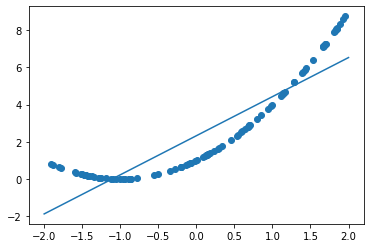

In [4]:
X = 4 * np.random.rand(100,1) - 2

Y = 4 + 2* X + X**2 - 3

reg = LinearRegression()
reg.fit(X,Y)

x_vals = np.linspace(-2,2,100).reshape(-1,1)
y_vals = reg.predict(x_vals)
plt.scatter(X,Y)
plt.plot(x_vals, y_vals)
plt.show()

In [5]:
def CalculatePolynomialForX(x, coefs):
  y = 0
  for power, a in enumerate(coefs):
    y += a * (x**power)
  return y

In [77]:
def plotPolynomial(coefs : list, a :int, b :int, X1=None, actual_data=None) -> None:
  x_vals = np.linspace(a,b,100).reshape(-1,1)
  y_vals = [CalculatePolynomialForX(x, coefs) for x in x_vals]

  try:
    plt.scatter(X1, Y1)
  except ValueError:
    pass
  plt.plot(x_vals, y_vals)
  plt.show()


In [94]:
class PolynomialRegression:
  def __init__(self, degree=3):
    self.degree = 0
    self.coefs = np.random.randn(degree + 1)
  def mse(self,y, yhat):
      return (1 / len(y)) * np.sum((y-yhat)**2)
  def fit(self, X, Y):
    loss_hist = []
    num_iter = 100
    hist = {}
    coefs= self.coefs.copy()
    learning_rate = 0.001
    y_pred = np.array([CalculatePolynomialForX(x, coefs) for x in X])
    loss = self.mse(y_pred,Y)
    loss_hist.append(loss)  
    for j in range(1,num_iter):
      y_pred = np.array([CalculatePolynomialForX(x, coefs) for x in X])
      loss = self.mse(y_pred,Y)
      loss_hist.append(loss)
      for i in range(len(coefs)):
        coefs[i] = coefs[i] - learning_rate * (1 / len(coefs))  * np.dot(y_pred.T , loss)
      # print(f"at iter n{j} values are {coefs}, loss is {loss}")
    self.coefs = coefs
    return self.coefs, loss_hist

In [95]:
t = PolynomialRegression(degree=10)
X1 = 4 * np.random.rand(100,1) - 2
Y1 = 4 + 2* X1 + X1**2
(coefs, hist) = t.fit(X1, Y1)

ValueError: ignored

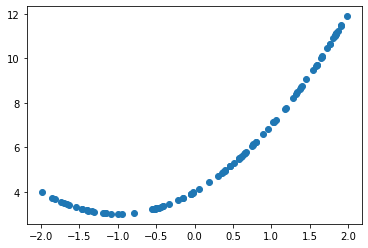

In [70]:
plt.scatter(X1,Y1)

In [ ]:
hist

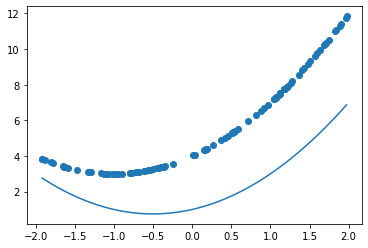

In [88]:
plt.scatter(X1,Y1)
plotPolynomial([1, 1,1], np.min(X1), np.max(X1))

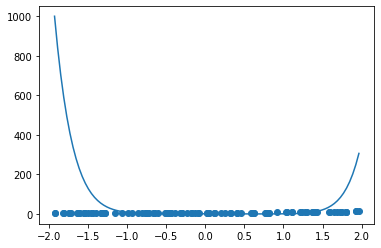

In [93]:
plotPolynomial(coefs, np.min(X1), np.max(X1), X1, Y1)

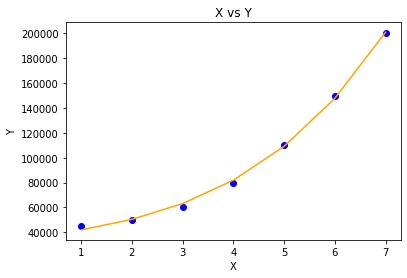

In [108]:
# Importing libraries

import numpy as np

import math

import matplotlib.pyplot as plt

# Univariate Polynomial Regression


class PolynomailRegression:
    def __init__(self, degree, learning_rate, iterations):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations

    # function to transform X
    def transform(self, X):
        # initialize X_transform
        X_transform = np.ones((self.m, 1))
        j = 0
        for j in range(1,self.degree + 1):
            x_pow = np.power(X, j)
            # append x_pow to X_transform
            X_transform = np.append(X_transform, x_pow.reshape(-1, 1), axis=1)
        return X_transform

    # function to normalize X_transform
    def normalize(self, X):
        X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
        return X

    # model training
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        self.m, self.n = self.X.shape
        # weight initialization
        self.W = np.zeros(self.degree + 1)
        # transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform(self.X)
        # normalize X_transform
        X_normalize = self.normalize(X_transform)
        # gradient descent learning
        for i in range(self.iterations):
            h = self.predict(self.X)
            error = h - self.Y
            # update weights
            self.W = self.W - self.learning_rate * (1 / self.m) * np.dot(X_normalize.T, error)
        return self

    # predict
    def predict(self, X):
        # transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform(X)
        X_normalize = self.normalize(X_transform)
        return np.dot(X_transform, self.W)


# Driver code
def main():
    # Create dataset
    X = np.array([[1], [2], [3], [4], [5], [6], [7]])
    Y = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000])
    # model training
    model = PolynomailRegression(degree=4, learning_rate=0.001, iterations=10000)
    model.fit(X, Y)
    Y_pred = model.predict(X)
    plt.scatter(X, Y, color="blue")
    plt.plot(X, Y_pred, color="orange")
    plt.title("X vs Y")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


if __name__ == "__main__":
    main()
